# Data Analysis and Preprocessing

This task focuses on preparing the dataset for subsequent analysis through the following steps:

1. **Managing Missing Values**: Address missing data by imputing values or removing affected entries to maintain integrity.
2. **Data Cleaning**: Eliminate duplicates and ensure correct data types for consistency.
3. **Exploratory Data Analysis (EDA)**: Conduct univariate and bivariate analyses to understand features and their interactions.
4. **Geolocation Analysis**:
   - Convert IP addresses to integer format for easier handling.
   - Merge `Fraud_Data.csv` with `IpAddress_to_Country.csv` to incorporate geolocation information.
5. **Feature Engineering**:
   - Analyze transaction frequency and velocity in `Fraud_Data.csv`.
   - Generate time-based features like `hour_of_day` and `day_of_week` to capture trends.
6. **Normalization and Scaling**: Normalize and scale features to ensure readiness for modeling.
7. **Categorical Feature Encoding**: Convert categorical variables into a numerical format.

Executing these steps will enhance the quality of our dataset and prepare it for further analysis and modeling.


# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import sys


In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from utils import *
from visualizations import *

# 2. Loading data

In [3]:
path = '../data/Fraud_Data.csv'
path2 = '../data/IpAddress_to_Country.csv'
path3 = '../data/creditcard.csv'
df_creditcard = data_loader(path3)
df_IpAddress_to_Country = data_loader(path2)
df_fraud_data = data_loader(path)

### Learning about the data

In [4]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df_IpAddress_to_Country.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
df_fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [7]:
column_summary(df_creditcard)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Time,float64,0,284807,124592,"{163152.0: 36, 64947.0: 26, 68780.0: 25, 3767...."
1,V1,float64,0,284807,275663,"{2.05579700630039: 77, 1.24567381944824: 77, 2..."
2,V2,float64,0,284807,275663,"{-0.32666777306077: 77, 0.166975019545401: 77,..."
3,V3,float64,0,284807,275663,"{-2.75204095570008: 77, 0.488305742562781: 77,..."
4,V4,float64,0,284807,275663,"{-0.842316033286871: 77, 0.6353219207244: 77, ..."
5,V5,float64,0,284807,275663,"{2.46307225982454: 77, -0.562776680773863: 77,..."
6,V6,float64,0,284807,275663,"{3.17385642307029: 77, -1.01107261632698: 77, ..."
7,V7,float64,0,284807,275663,"{-0.432125923987824: 77, 0.0149526614685896: 7..."
8,V8,float64,0,284807,275663,"{0.727706200727824: 77, -0.160210863301812: 77..."
9,V9,float64,0,284807,275663,"{0.608605870267216: 77, 0.17036185217373: 77, ..."


In [8]:
column_summary(df_IpAddress_to_Country)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,lower_bound_ip_address,float64,0,138846,138846,"{16777216.0: 1, 3322413056.0: 1, 3322437632.0:..."
1,upper_bound_ip_address,int64,0,138846,138846,"{16777471: 1, 3322415103: 1, 3322445823: 1, 33..."
2,country,object,0,138846,235,"{'United States': 46868, 'Canada': 6989, 'Russ..."


In [9]:
column_summary(df_fraud_data)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,user_id,int64,0,151112,151112,"{22058: 1, 330367: 1, 265670: 1, 293466: 1, 19..."
1,signup_time,object,0,151112,151112,"{'2015-02-24 22:55:49': 1, '2015-03-29 18:25:3..."
2,purchase_time,object,0,151112,150679,"{'2015-06-08 09:42:04': 3, '2015-07-17 23:22:5..."
3,purchase_value,int64,0,151112,122,"{28: 3328, 27: 3196, 32: 3174, 24: 3152, 26: 3..."
4,device_id,object,0,151112,137956,"{'CQTUVBYIWWWBC': 20, 'ITUMJCKWEYNDD': 20, 'EQ..."
5,source,object,0,151112,3,"{'SEO': 60615, 'Ads': 59881, 'Direct': 30616}"
6,browser,object,0,151112,5,"{'Chrome': 61432, 'IE': 36727, 'Safari': 24667..."
7,sex,object,0,151112,2,"{'M': 88293, 'F': 62819}"
8,age,int64,0,151112,58,"{32: 6666, 31: 6591, 33: 6567, 30: 6392, 29: 6..."
9,ip_address,float64,0,151112,143512,"{1502818419.73176: 20, 576060872.527378: 20, 3..."


In [10]:
df_fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

# 3 Managing Missing Values

In [11]:
missing_values_table(df_fraud_data)

,Missing Values,% of Total Values


In [12]:
missing_values_table(df_IpAddress_to_Country)

,Missing Values,% of Total Values


In [13]:
missing_values_table(df_creditcard)

,Missing Values,% of Total Values


## Insight: # 3. Managing Missing Values

After analyzing the missing values in each dataset, I found that none of the data frames have any missing values. Here are the details:

- **df_fraud_data**: No missing values.
- **df_IpAddress_to_Country**: No missing values.
- **df_creditcard**: No missing values.

This ensures that our datasets are complete and ready for further analysis.

# 4. Data Cleaning

### Removing Duplicate Entries

In [14]:
df_fraud_data.duplicated().sum()
print(f"Number of duplicate rows in df_fraud_data: {df_fraud_data.duplicated().sum()} fraud data")

Number of duplicate rows in df_fraud_data: 0 fraud data


In [15]:
df_creditcard.duplicated().sum()
print(f"Number of duplicate rows in df_fraud_data: {df_creditcard.duplicated().sum()} credit card data")

Number of duplicate rows in df_fraud_data: 1081 credit card data


### Dropping duplicate entries of credit card data

In [16]:
df_creditcard = df_creditcard.drop_duplicates()

In [17]:
df_IpAddress_to_Country.duplicated().sum()
print(f"Number of duplicate rows in df_fraud_data: {df_IpAddress_to_Country.duplicated().sum()} IpAddress to Country data")

Number of duplicate rows in df_fraud_data: 0 IpAddress to Country data


## Insight: Duplicate Entries

- **df_fraud_data**: 0 duplicate rows.
- **df_creditcard**: 1081 Duplicated rows before removing duplicates and 0 duplicate rows after dropping duplicates.
- **df_IpAddress_to_Country**: 0 duplicate rows.

All datasets are free of duplicate entries, ensuring data integrity for further analysis.


## Correcting data types


In [18]:
df_creditcard['Time'] = pd.to_datetime(df_creditcard['Time'], unit='s')

In [19]:
df_IpAddress_to_Country['lower_bound_ip_address'] = df_IpAddress_to_Country['lower_bound_ip_address'].astype('int64')

In [20]:
import ipaddress

df_IpAddress_to_Country['lower_bound_ip_address'] = df_IpAddress_to_Country['lower_bound_ip_address'].apply(lambda x: ipaddress.ip_address(x))

In [21]:
import ipaddress

df_IpAddress_to_Country['upper_bound_ip_address'] = df_IpAddress_to_Country['upper_bound_ip_address'].apply(lambda x: ipaddress.ip_address(x))

In [22]:
df_IpAddress_to_Country['country'] = df_IpAddress_to_Country['country'].astype('str')

In [23]:
df_fraud_data['signup_time'] = pd.to_datetime(df_fraud_data['signup_time'])

In [24]:
df_fraud_data['purchase_time'] = pd.to_datetime(df_fraud_data['purchase_time'])

In [25]:
to_str = ['device_id', 'source', 'browser', 'sex']

In [26]:
for column in to_str:
    df_fraud_data[column] = df_fraud_data[column].astype('str')

In [27]:
import ipaddress

df_fraud_data['ip_address'] = df_fraud_data['ip_address'].apply(lambda x: ipaddress.ip_address(int(x)))


## Insight: Correcting Data Types

I performed the following type conversions for consistency:

- **df_creditcard**: 'Time' to datetime.
- **df_IpAddress_to_Country**: 
    - 'lower_bound_ip_address' and 'upper_bound_ip_address' to IP address format.
    - 'country' to string.
- **df_fraud_data**:
    - 'signup_time' and 'purchase_time' to datetime.
    - 'device_id', 'source', 'browser', and 'sex' to string.
    - 'ip_address' to IP address format.

These conversions ensure accurate data analysis and manipulation.


# 5. Exploratory Data Analysis (EDA)

## Univariate Analysis

In [28]:
univariate_columns_credit_card = ['Amount', 'Class']
univariate_columns_IpAddress_to_Country = ['country']
univariate_columns_fraud_data = ['purchase_value', 'source', 'browser', 'class', 'age', 'sex']

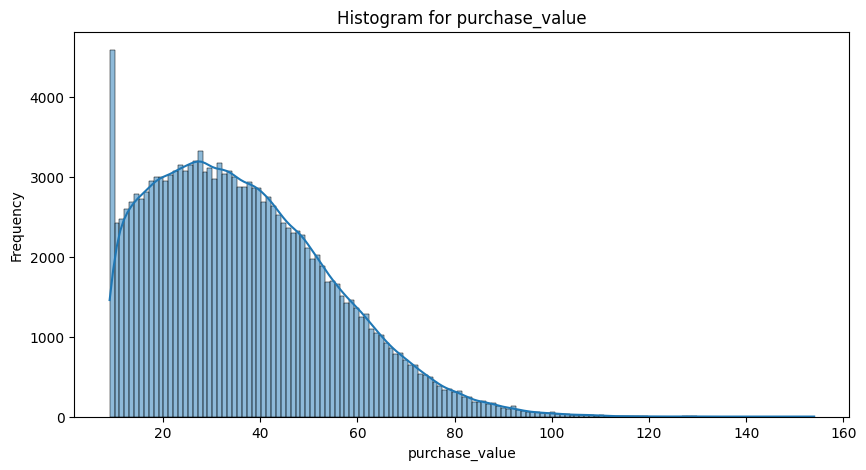

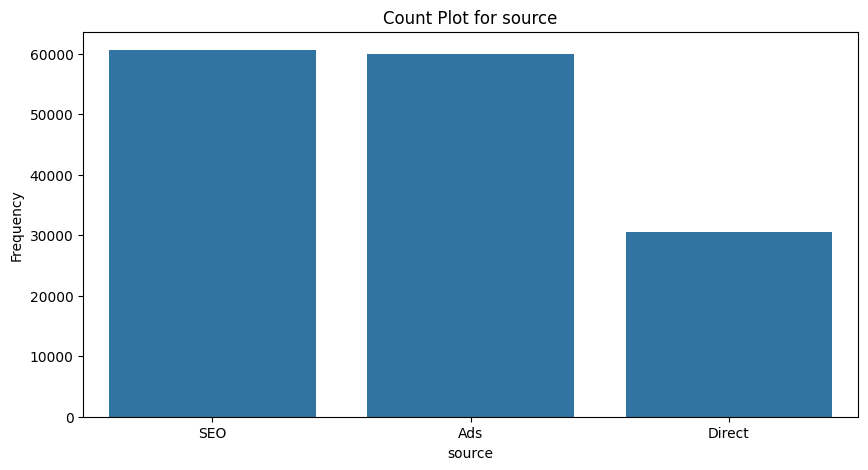

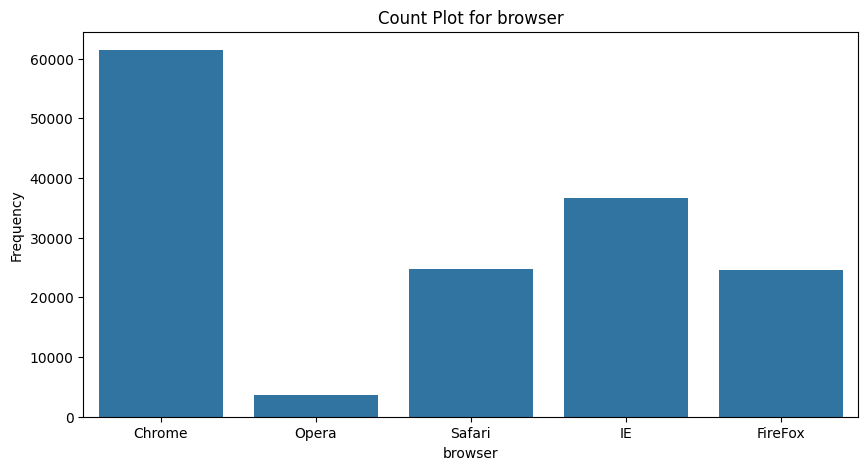

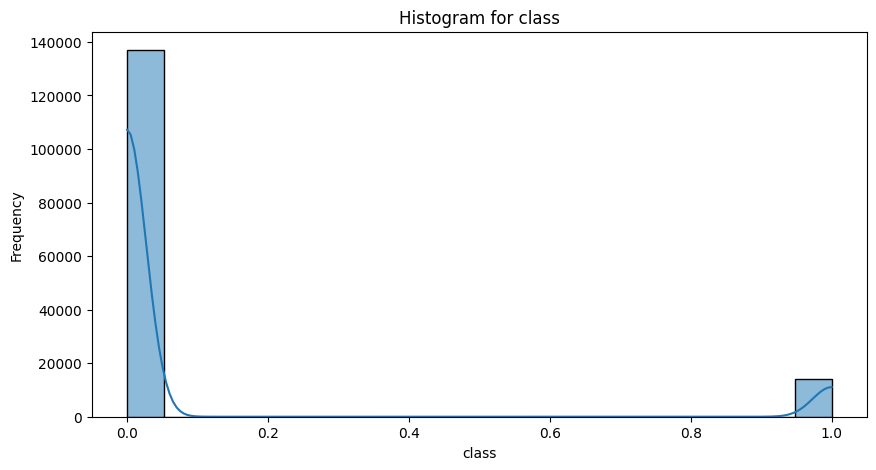

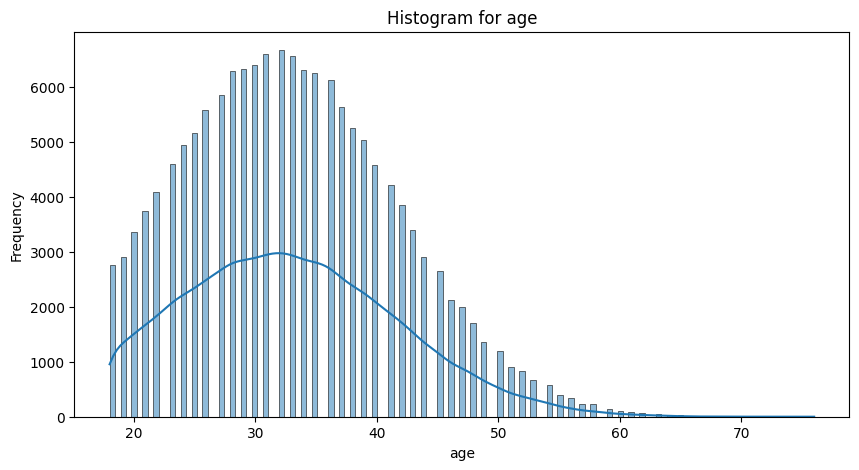

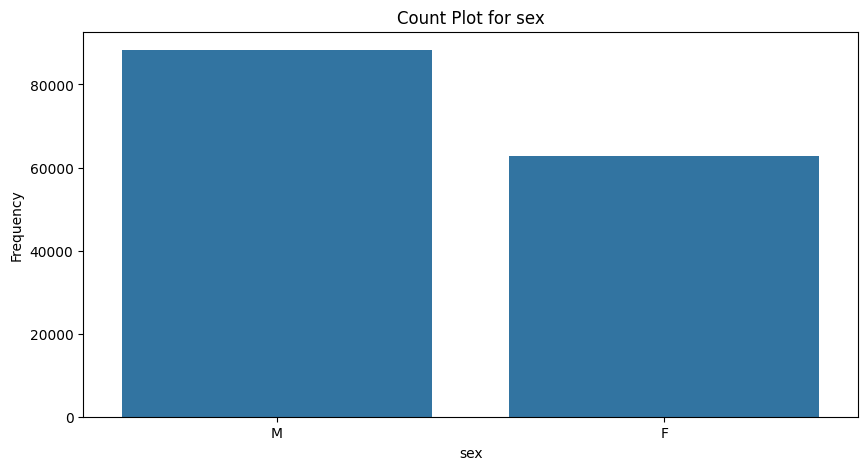

In [29]:
plot_univariate_analysis(df_fraud_data, univariate_columns_fraud_data)

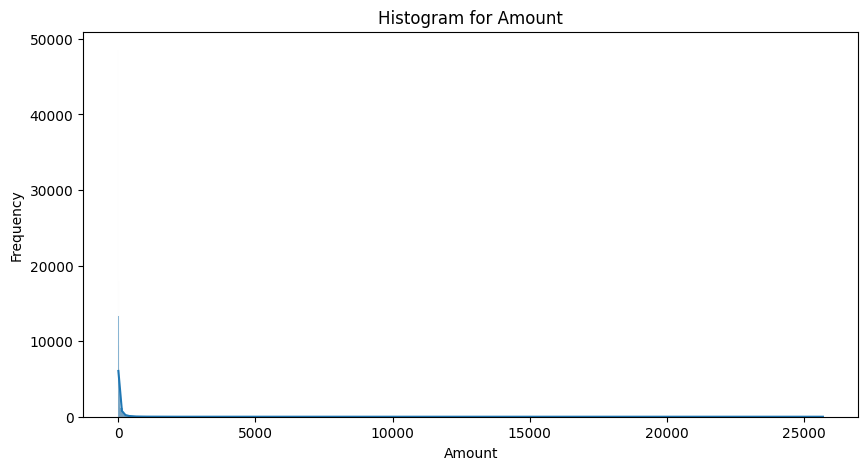

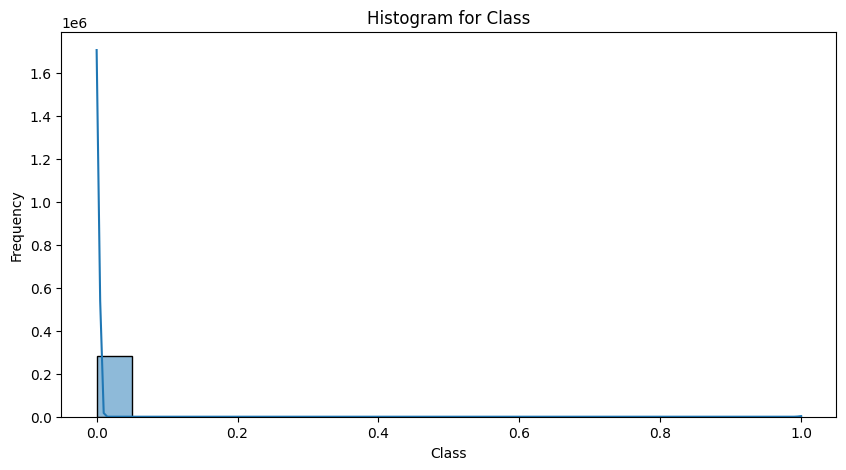

In [30]:
plot_univariate_analysis(df_creditcard, univariate_columns_credit_card)

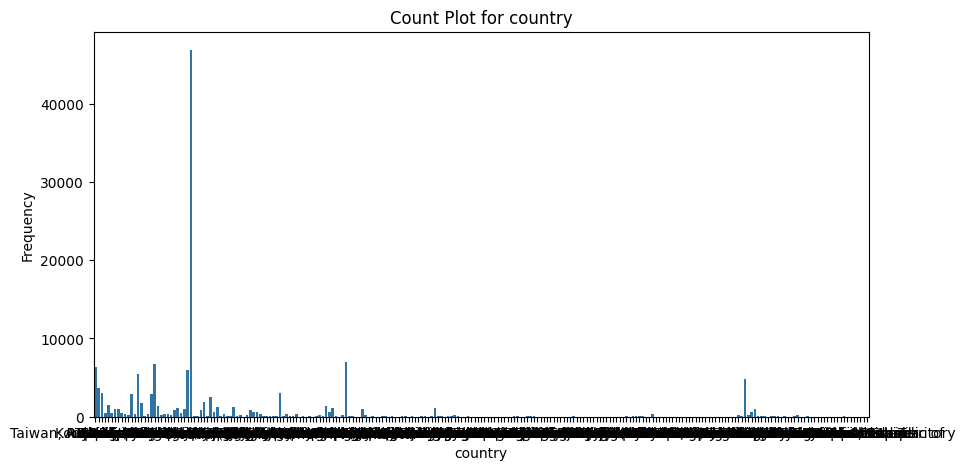

In [31]:
plot_univariate_analysis(df_IpAddress_to_Country, univariate_columns_IpAddress_to_Country)

## Bivariate Analysis

In [32]:
amount_class = ['Amount', 'Class']
class_sex = ['Class', 'sex']
class_age = ['Class', 'age']
class_source = ['Class', 'source']
class_purchase_value = ['Class', 'purchase_value']

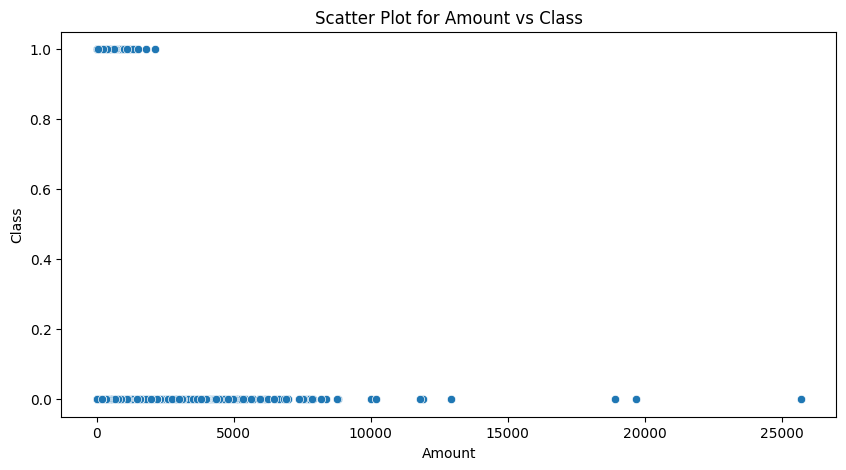

[<Axes: title={'center': 'Scatter Plot for Amount vs Class'}, xlabel='Amount', ylabel='Class'>]

In [33]:
plot_bivariate_analysis(df_creditcard, amount_class)

In [34]:
plot_bivariate_analysis(df_fraud_data, class_sex)

[]

<Figure size 1000x500 with 0 Axes>

In [35]:
plot_bivariate_analysis(df_fraud_data, class_age)

[]

<Figure size 1000x500 with 0 Axes>

In [36]:
plot_bivariate_analysis(df_fraud_data, class_source)

[]

<Figure size 1000x500 with 0 Axes>

In [37]:
plot_bivariate_analysis(df_fraud_data, class_purchase_value)

[]

<Figure size 1000x500 with 0 Axes>